In [1]:
seed = 0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from numpy import random

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [7]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# Data Prepocessing

In [8]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

In [9]:
Y = Y.reshape(400,1)

In [10]:
Y.shape

(400, 1)

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(300, 2)
(100, 2)
(300, 1)
(100, 1)


# Helper functions

In [14]:
def sigmoid(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1/(1+np.exp(-z))
    
    return s

In [15]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1)) * 0.01
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

# Forward and Backward propagation

In [16]:
def propagate(w, b, X, Y):
    """
    Implements the cost function and its gradients

    Arguments:
    w -- weights, a numpy array of size (dim, 1)
    b -- bias, a scalar
    X -- data of size (number of examples, 2)
    Y -- true "label" vector (0 or 1) of size (number of examples, 1)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(X, w) + b)               
    loss = - (Y * np.log(A) + (1-Y)* np.log(1-A))
    cost =  np.sum(loss) / m                           
 
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X.T, (A-Y)) / m
    db = np.sum(A - Y) / m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# Optimization

In [17]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (2, 1)
    b -- bias, a scalar
    X -- data of shape (number of examples, 2)
    Y -- true "label" vector (0 or 1) of size (number of examples, 1)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [18]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (2, 1)
    b -- bias, a scalar
    X -- data of size (number of examples, 2)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((m,1))
    w = w.reshape(X.shape[1], 1)
    
    # Compute vector "A" predicting the probabilities of a test point
    A = sigmoid(np.dot(X, w) + b)
    
    for i in range(A.shape[0]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[i][0] > 0.5:
            Y_prediction[i][0]=1
        else:
            Y_prediction[i][0]=0
        pass
    
    assert(Y_prediction.shape == (m, 1))
    
    return Y_prediction

In [19]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[1])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [20]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.682202
Cost after iteration 200: 0.671855
Cost after iteration 300: 0.662072
Cost after iteration 400: 0.652820
Cost after iteration 500: 0.644067
Cost after iteration 600: 0.635784
Cost after iteration 700: 0.627942
Cost after iteration 800: 0.620514
Cost after iteration 900: 0.613474
Cost after iteration 1000: 0.606799
Cost after iteration 1100: 0.600466
Cost after iteration 1200: 0.594454
Cost after iteration 1300: 0.588743
Cost after iteration 1400: 0.583315
Cost after iteration 1500: 0.578151
Cost after iteration 1600: 0.573237
Cost after iteration 1700: 0.568558
Cost after iteration 1800: 0.564098
Cost after iteration 1900: 0.559845
train accuracy: 82.0 %
test accuracy: 85.0 %


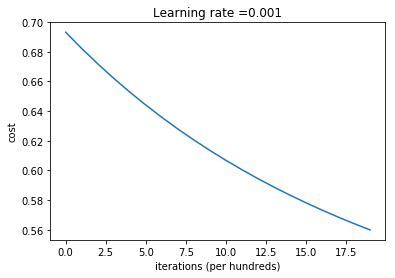

In [21]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 1
train accuracy: 81.0 %
test accuracy: 84.0 %

-------------------------------------------------------

learning rate is: 0.1
train accuracy: 81.0 %
test accuracy: 84.0 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 81.0 %
test accuracy: 84.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 81.33333333333333 %
test accuracy: 85.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 81.33333333333333 %
test accuracy: 85.0 %

-------------------------------------------------------



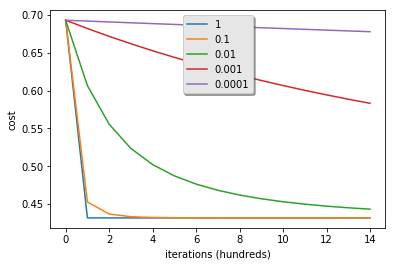

In [22]:
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, Y_train, X_test, Y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()